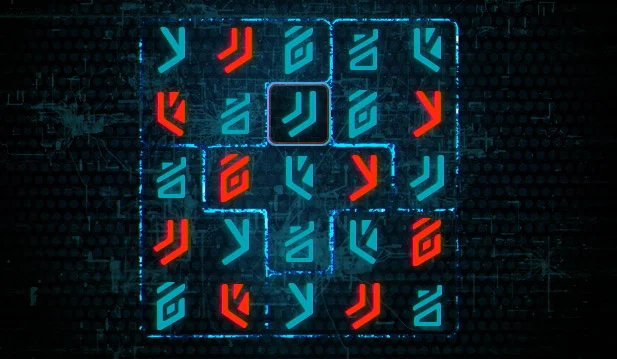

In [142]:
from z3 import *

Create the array necessary for holding the grid you can change size of the grid using `grid_size`

In [143]:
grid_size = 5
X = [[Int('x_%s_%s'%(i+1, j+1)) for j in range(grid_size)] for i in range(grid_size)]
s = Solver()

In [144]:
cells_limit = [ And(X[i][j] > 0 , X[i][j] <= grid_size)  for i in range(grid_size) for j in range(grid_size)]
rows_distinct = [ Distinct(X[i]) for i in range(grid_size) ]
cols_distinct = [ Distinct([X[i][j] for i in range(grid_size)]) for j in range(grid_size)]

puzzle_c = cells_limit + rows_distinct + cols_distinct

Set the pre-existing values in the grid
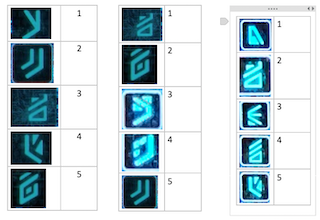

In [145]:
instance = (
    (0,0,4,0,3),
    (0,5,0,0,0),
    (0,4,3,1,0),
    (0,2,0,3,0),
    (0,0,0,0,5)
)

Create as many out all the distinct patterns as necessary with a unique integer index

In [146]:
subsets = (
    (0,0,0,1,1),
    (0,0,2,1,1),
    (3,2,2,2,1),
    (3,3,2,4,4),
    (3,3,4,4,4)
)

In [147]:
groups = max(max(subsets)) + 1
for gid in range(groups):
    group_rule = Distinct([X[i][j] for i in range(grid_size) for j in range(grid_size) if subsets[i][j] == gid])
    s.add(group_rule)

So this is where we are setting all the matrix values to true incase its a value we need to find. And the evaluate function somehow finds the numeric value.

In [148]:
instance_c = [ If(instance[i][j] == 0, True, X[i][j] == instance[i][j]) for i in range(grid_size) for j in range(grid_size)]
s.add(puzzle_c + instance_c)
s.check()

sat

In [149]:
m = s.model()
r = [ [ m.evaluate(X[i][j]) for j in range(grid_size) ] for i in range(grid_size) ]
print_matrix(r)

[[2, 1, 4, 5, 3],
 [3, 5, 2, 4, 1],
 [5, 4, 3, 1, 2],
 [1, 2, 5, 3, 4],
 [4, 3, 1, 2, 5]]


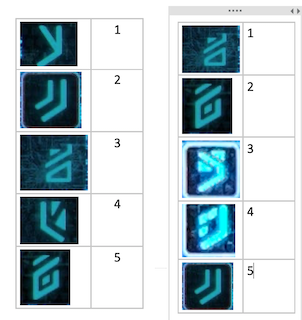

In [150]:
for a in s.assertions():
    print(a)


Distinct(x_1_1, x_1_2, x_1_3, x_2_1, x_2_2)
Distinct(x_1_4, x_1_5, x_2_4, x_2_5, x_3_5)
Distinct(x_2_3, x_3_2, x_3_3, x_3_4, x_4_3)
Distinct(x_3_1, x_4_1, x_4_2, x_5_1, x_5_2)
Distinct(x_4_4, x_4_5, x_5_3, x_5_4, x_5_5)
And(x_1_1 > 0, x_1_1 <= 5)
And(x_1_2 > 0, x_1_2 <= 5)
And(x_1_3 > 0, x_1_3 <= 5)
And(x_1_4 > 0, x_1_4 <= 5)
And(x_1_5 > 0, x_1_5 <= 5)
And(x_2_1 > 0, x_2_1 <= 5)
And(x_2_2 > 0, x_2_2 <= 5)
And(x_2_3 > 0, x_2_3 <= 5)
And(x_2_4 > 0, x_2_4 <= 5)
And(x_2_5 > 0, x_2_5 <= 5)
And(x_3_1 > 0, x_3_1 <= 5)
And(x_3_2 > 0, x_3_2 <= 5)
And(x_3_3 > 0, x_3_3 <= 5)
And(x_3_4 > 0, x_3_4 <= 5)
And(x_3_5 > 0, x_3_5 <= 5)
And(x_4_1 > 0, x_4_1 <= 5)
And(x_4_2 > 0, x_4_2 <= 5)
And(x_4_3 > 0, x_4_3 <= 5)
And(x_4_4 > 0, x_4_4 <= 5)
And(x_4_5 > 0, x_4_5 <= 5)
And(x_5_1 > 0, x_5_1 <= 5)
And(x_5_2 > 0, x_5_2 <= 5)
And(x_5_3 > 0, x_5_3 <= 5)
And(x_5_4 > 0, x_5_4 <= 5)
And(x_5_5 > 0, x_5_5 <= 5)
Distinct(x_1_1, x_1_2, x_1_3, x_1_4, x_1_5)
Distinct(x_2_1, x_2_2, x_2_3, x_2_4, x_2_5)
Distinct(x_3_1, x

In [151]:
for d in m.decls():
    print('%s = %s'%(d.name(), m[d]))

x_2_3 = 2
x_5_2 = 3
x_1_1 = 2
x_3_1 = 5
x_2_1 = 3
x_1_4 = 5
x_4_1 = 1
x_4_5 = 4
x_1_2 = 1
x_5_4 = 2
x_5_3 = 1
x_2_5 = 1
x_5_1 = 4
x_3_5 = 2
x_2_4 = 4
x_4_3 = 5
x_5_5 = 5
x_4_4 = 3
x_4_2 = 2
x_3_4 = 1
x_3_3 = 3
x_3_2 = 4
x_2_2 = 5
x_1_5 = 3
x_1_3 = 4
